In [8]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [9]:
# 1. Chuẩn bị dữ liệu
data = {
    'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'y': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41]
}

X = np.array(data['x']).reshape(-1, 1)  # Chuyển thành ma trận 2D (20, 1)
y = np.array(data['y'])
print(X,y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]] [ 3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41]


In [10]:
# 2. Chuẩn hóa dữ liệu (Chia train-test trước, chuẩn hóa sau)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Chỉ fit trên train
X_test_scaled = scaler.transform(X_test)        # Không fit lại

print(X_train_scaled,X_test_scaled)

[[-0.35612994]
 [-0.94558639]
 [ 0.23332651]
 [-1.33855735]
 [ 1.60872489]
 [ 1.21575393]
 [ 0.62629748]
 [-1.53504284]
 [-0.15964445]
 [ 1.80521037]
 [-1.14207187]
 [ 0.42981199]
 [-0.55261542]
 [ 0.03684103]
 [ 0.82278296]
 [-0.7491009 ]] [[-1.9280138 ]
 [ 1.41223941]
 [ 1.01926844]
 [-1.73152832]]


In [24]:
# 3. Hàm hỗ trợ
def predict(X, w, b):
    return X * w + b

def compute_loss(y, y_hat):
    return np.mean((y - y_hat)**2)  # MSE

def compute_gradient(X_batch, y_batch, w, b):
    y_hat = predict(X_batch, w, b)
    dw = (2/len(X_batch)) * np.sum(X_batch * (y_hat - y_batch))  # Đã sửa
    db = (2/len(X_batch)) * np.sum(y_hat - y_batch)
    return dw, db

Epoch 0: Loss = 583.6183, w = 0.0189, b = 0.7159
Epoch 10: Loss = 356.2195, w = 0.5287, b = 6.7401
Epoch 20: Loss = 237.3486, w = 1.0396, b = 11.1073
Epoch 30: Loss = 174.8045, w = 1.1994, b = 14.2730
Epoch 40: Loss = 142.1684, w = 1.3849, b = 16.5718
Epoch 50: Loss = 125.8982, w = 1.7437, b = 18.2377
Epoch 60: Loss = 117.2699, w = 1.8808, b = 19.4433
Epoch 70: Loss = 113.1473, w = 2.0514, b = 20.3164
Epoch 80: Loss = 110.7544, w = 2.0852, b = 20.9526
Epoch 90: Loss = 109.3275, w = 2.0626, b = 21.4151
Epoch 0: Loss = 366.0023, w = 0.6237, b = 6.4385
Epoch 10: Loss = 114.8135, w = 3.3269, b = 22.2561
Epoch 20: Loss = 108.8212, w = 2.2829, b = 22.6412
Epoch 30: Loss = 109.5392, w = 2.4308, b = 22.4798
Epoch 40: Loss = 113.6373, w = 3.1648, b = 22.5152
Epoch 50: Loss = 106.6101, w = 1.7320, b = 22.5928
Epoch 60: Loss = 115.4280, w = 3.4378, b = 22.6464
Epoch 70: Loss = 110.9036, w = 2.7008, b = 22.6344
Epoch 80: Loss = 107.8498, w = 2.0557, b = 22.5049
Epoch 90: Loss = 111.8853, w = 2.876

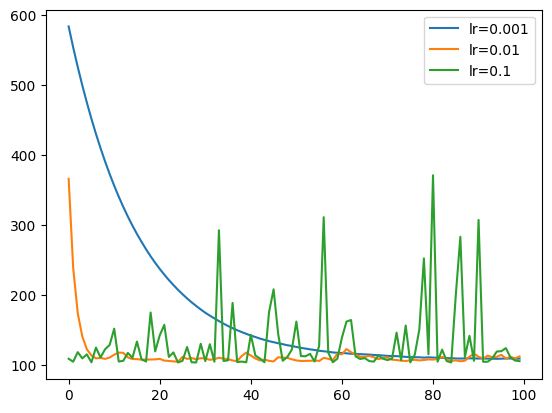

In [31]:
learning_rates = [0.001, 0.01, 0.1]
for lr in learning_rates:
    w, b, history = mini_batch_gd(X_train_scaled, y_train, lr=lr, epochs=100)
    plt.plot(history['loss'], label=f'lr={lr}')
plt.legend()
plt.show()

In [32]:
# 4. Mini-batch Gradient Descent
def mini_batch_gd(X, y, batch_size=4, lr=0.01, epochs=100):
    w, b = 0.0, 0.0  # Khởi tạo tham số
    n_samples = len(X)
    history = {'loss': [], 'w': [], 'b': []}

    for epoch in range(epochs):
        # Xáo trộn dữ liệu mỗi epoch
        indices = np.random.permutation(n_samples)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        # Duyệt qua từng batch
        for i in range(0, n_samples, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]

            # Tính gradient và cập nhật tham số
            dw, db = compute_gradient(X_batch, y_batch, w, b)
            w -= lr * dw
            b -= lr * db

        # Tính loss sau mỗi epoch (trên toàn bộ tập train)
        y_hat = predict(X, w, b)
        loss = compute_loss(y, y_hat)
        history['loss'].append(loss)
        history['w'].append(w)
        history['b'].append(b)

        if epoch % 10 == 0:
            print(f"Epoch {epoch}: Loss = {loss:.4f}, w = {w:.4f}, b = {b:.4f}")

    return w, b, history

In [33]:
# 5. Huấn luyện
batch_size = 4
w_final, b_final, history = mini_batch_gd(X_train_scaled, y_train, batch_size, lr=0.1, epochs=100)
print(f"Final parameters: w = {w_final:.4f}, b = {b_final:.4f}")

Epoch 0: Loss = 117.2096, w = 1.8149, b = 25.8353
Epoch 10: Loss = 109.1111, w = 1.4609, b = 20.7899
Epoch 20: Loss = 104.3891, w = 0.8480, b = 22.8712
Epoch 30: Loss = 105.5334, w = 1.1650, b = 23.3779
Epoch 40: Loss = 284.6992, w = 13.3265, b = 24.4944
Epoch 50: Loss = 125.4173, w = 3.0419, b = 19.0817
Epoch 60: Loss = 140.4412, w = 5.2863, b = 19.6440
Epoch 70: Loss = 104.1342, w = 0.4683, b = 23.1778
Epoch 80: Loss = 108.4031, w = 1.9125, b = 21.5591
Epoch 90: Loss = 104.2066, w = 0.7479, b = 22.8195
Final parameters: w = 1.5808, b = 24.6262


In [34]:
# 6. Đánh giá trên tập test
y_test_pred = predict(X_test_scaled, w_final, b_final)
test_loss = compute_loss(y_test, y_test_pred)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Final Parameters: w = {w_final:.4f}, b = {b_final:.4f}")


Test Loss: 270.1429
Final Parameters: w = 1.5808, b = 24.6262
